# HW 1-3 Image Compression

In [2]:
# https://www.geeksforgeeks.org/image-compression-using-k-means-clustering/ 

import pandas as pd
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from joblib import dump
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [63]:
image = Image.open("data/football.bmp")
image

pixels_og = np.asarray(image)
pixels = np.reshape(pixels_og,(-1,3))


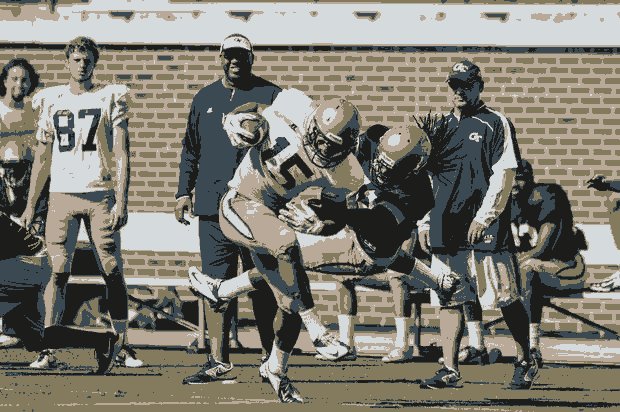

In [4]:
# SciPy Version
comp = KMeans(n_clusters=5,n_init=10)
comp.fit(pixels)
centroid = np.array([list(comp.cluster_centers_[label]) 
                           for label in comp.labels_])




centroid = centroid.astype("uint8")
# reshape this array according to the height and width of our image
centroids_reshaped = np.reshape(centroid, (image.height, image.width, 3), "C")


compressed_im = Image.fromarray(centroids_reshaped)

# display compressed image
compressed_im


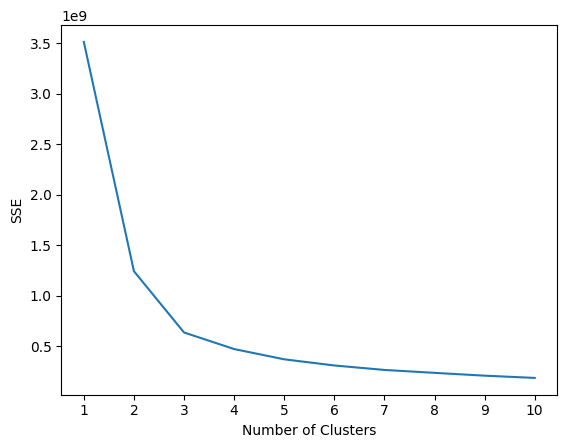

In [13]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pixels)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [8]:
"""
stop = 1
cluster = np.zeros((1,len(pixels)))
cluster_prev = cluster
it = 0

k = 5

centr = np.zeros((k,3))

for i in range(k):
    rand = np.random.choice(len(pixels),size=10, replace=False)
    centr[i] = np.mean(pixels[rand],axis=0)
    

while stop == 1:
    for id1 in range(len(pixels)):
        dist = np.zeros((1,k))
 
        for ic in range(k):
            dist_ = LA.norm((pixels[id1,:])-centr[ic,:])
            dist = np.append(dist, dist_)
        cluster_ = np.argmin(dist)
        cluster = np.append(cluster, cluster_)
    
    for ic in range(k):
        center = np.append(np.mean(pixels[:,clusters==ic],axis=0))
        
    if np.abs(cluster_prev - cluster) < 1e-4:
        stop = 0
        
    cluster_prev = cluster
    
    it += 1
"""



'\nstop = 1\ncluster = np.zeros((1,len(pixels)))\ncluster_prev = cluster\nit = 0\n\nk = 5\n\ncentr = np.zeros((k,3))\n\nfor i in range(k):\n    rand = np.random.choice(len(pixels),size=10, replace=False)\n    centr[i] = np.mean(pixels[rand],axis=0)\n    \n\nwhile stop == 1:\n    for id1 in range(len(pixels)):\n        dist = np.zeros((1,k))\n \n        for ic in range(k):\n            dist_ = LA.norm((pixels[id1,:])-centr[ic,:])\n            dist = np.append(dist, dist_)\n        cluster_ = np.argmin(dist)\n        cluster = np.append(cluster, cluster_)\n    \n    for ic in range(k):\n        center = np.append(np.mean(pixels[:,clusters==ic],axis=0))\n        \n    if np.abs(cluster_prev - cluster) < 1e-4:\n        stop = 0\n        \n    cluster_prev = cluster\n    \n    it += 1\n'

Iterations: 40


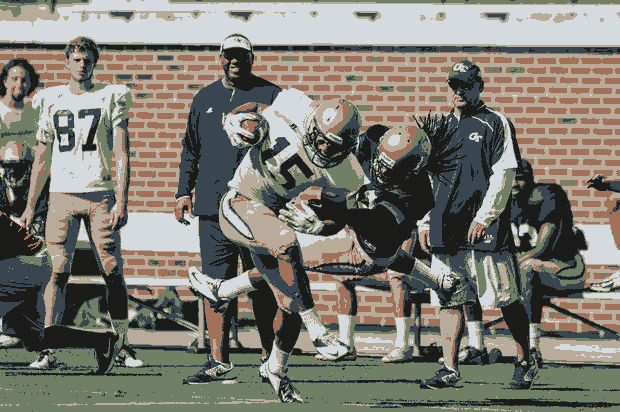

In [5]:
# My Version

def k_means(X, k, max_iters=1000):
    num_samples, num_features = X.shape

    # Initialize centroids randomly from data points
    centroids = X[np.random.choice(num_samples, k, replace=False)]
    iterations = 0
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        iterations += 1
        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels, iterations



# Run k-means algorithm
centroids, labels, iterations = k_means(pixels, k)
#print("Final centroids:", centroids)
#print("Cluster labels:", labels)
print("Iterations:", iterations)
centroid = np.array([list(centroids[label]) 
                           for label in labels])

centroid = centroid.astype("uint8")
centroids_reshaped = np.reshape(centroid, (image.height, image.width, 3), "C")


compressed_im = Image.fromarray(centroids_reshaped)

# display compressed image
compressed_im



# HW 1-4 MNIST Dataset Clustering

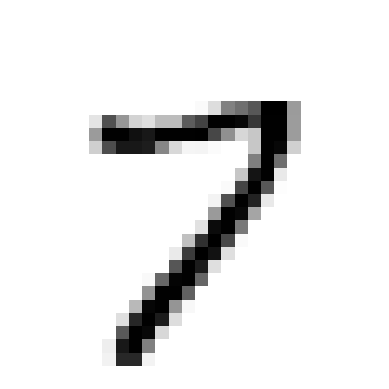

7


In [7]:
import scipy.io
from sklearn import metrics
mat = scipy.io.loadmat('data/mnist_10digits.mat')

xtrain = mat['xtrain']/255
ytrain = mat['ytrain']
xtest = mat['xtest']/255
ytest = mat['ytest']



some_digit = xtrain[30001]   # Selecting the 36,000th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print(ytrain[0,30001])

In [5]:
K = 10
comp = KMeans(n_clusters=K ,n_init=10)
comp.fit(xtrain)
ypred = comp.labels_
ypred1 = comp.predict(xtrain)



# centroid = np.array([list(comp.cluster_centers_[label]) 
#                            for label in comp.labels_])


In [32]:
def k_means(X, k, max_iters=100):
    num_samples, num_features = X.shape

    # Initialize centroids randomly from data points
    centroids = X[np.random.choice(num_samples, k, replace=False)]
    iterations = 0
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        print(1)
        distances_euclid = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        #distances_manhattan = np.sum(np.abs(X[:, np.newaxis] - centroids), axis=2)
        print(2)
        labels = np.argmin(distances_euclid, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        iterations += 1
        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids
 
    return centroids, labels, iterations
K = 10
centroids, labels, iterations = k_means(xtrain, K)


1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2


In [33]:
def purity_score(y_true, y_pred,index):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # print(np.sum(contingency_matrix,axis=0)) # colujmns
    # print(np.sum(contingency_matrix,axis=1)) # rows
    # return purity
    return np.amax(contingency_matrix[index], axis=0) / np.sum(contingency_matrix[index]) 

for i in range(K):
    print(purity_score(ytrain,ypred,i), "\n")
    
    
print('______________________')
for i in range(K):
    print(purity_score(ytrain,labels,i), "\n")

purity1 = purity_score(ytrain,ypred,[0,9])
purity = purity_score(ytrain,labels,[0,9])
print('p1', purity1,np.sum(purity1))
print('p', purity,np.sum(purity))
#print(np.sum(purity))

0.4744217457369576 

0.55146840700089 

0.7039274924471299 

0.6398629913554069 

0.5457035261896611 

0.32650802434975096 

0.8303480905711389 

0.6022346368715084 

0.5918646385233294 

0.48781307782820643 

______________________
0.7227756204626035 

0.9796796202907149 

0.6988922457200403 

0.6436144185287881 

0.38942143101677507 

0.33702268954067516 

0.6240283879689084 

0.43048683160415 

0.5899846180140147 

0.4002353336695243 

p1 [0.20721024 0.21049528 0.00143194 0.01490903 0.00985512 0.02021563
 0.23669137 0.2444407  0.01533019 0.01364555] 0.9742250673854448
p [0.00075809 0.00454852 0.20055593 0.13527628 0.01356132 0.09610849
 0.01971024 0.13578167 0.36059636 0.0108659 ] 0.9777628032345013


# HW 1-5 Political Blog Dataset

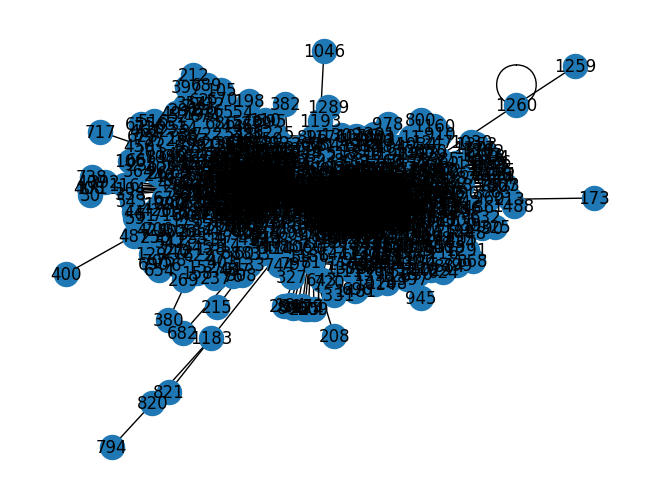

In [277]:
import pandas as pd
import networkx as nx
from sklearn.cluster import SpectralClustering


nodes = pd.read_table("data/nodes.txt",names=["Node", "Verticies", "Political Orien", "NA"])
edges = pd.read_table("data/edges.txt",names=["V1",'V2']).drop_duplicates()
edges1 = list(edges.itertuples(index=False, name=None))
g = nx.Graph()
g.add_nodes_from(nodes.Node)
#g.add_edges_from(edges)

g=nx.from_pandas_edgelist(edges,"V1","V2")

nodes1 = max(nx.connected_components(g), key=len)
H = nx.subgraph(g, nodes1)

nx.draw(H, with_labels=True)
#isolated = list(nx.isolates(g))
#print(isolated)

# n_clusters = 3  # Number of clusters
# spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
# labels = spectral_clustering.fit_predict(edges)



In [170]:
np.shape(nodes)

(1490, 4)

In [105]:
edges.loc[(edges['V1'] > 12) & (edges['V2'] == 12)]


,V1,V2
16007,659,12


In [179]:
nx.is_connected(g)

False

In [177]:
nodes = max(nx.connected_components(g), key=len)
H = nx.subgraph(g, nodes)

In [178]:
print(H)

Graph with 1222 nodes and 16717 edges


In [180]:
nx.is_connected(H)

True

In [186]:
f_path = abspath("play_graph.txt")


In [187]:
f_path

'C:\\Users\\Patrick Gardocki\\Documents\\GT\\Courses\\ISYE6740\\HW1\\homework1\\play_graph.txt'

Not a Proper Input in Edge 1490,802


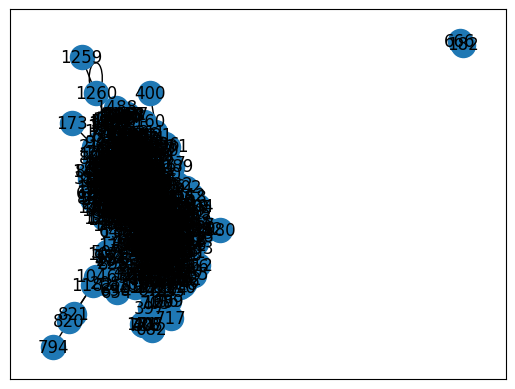

In [198]:
def createAdjacencyMatrix(vertices,edges):
  noofvertices=len(vertices)
  adjM=[]
  while(len(adjM)<noofvertices):
    temp=[]
    for i in range(noofvertices):
      temp.append(0)
    adjM.append(temp)
  for edge in edges:
    i=edge[0]
    j=edge[1]
    if i>=noofvertices or j>=noofvertices or i<0 or j<0:
      print(f"Not a Proper Input in Edge {i},{j}")
    else:
      adjM[i][j]=1
      adjM[j][i]=1
  G=nx.Graph()
  G.add_edges_from(edges)
  nx.draw_networkx(G)
  plt.show()
  return adjM


a = createAdjacencyMatrix(nodes, edges1)

In [201]:
edges.V1

0         267
1         267
2         267
3         904
4         904
         ... 
19085    1133
19086    1133
19087    1133
19088    1133
19089    1133
Name: V1, Length: 19025, dtype: int64

In [233]:
i = edges.V1
j = edges.V2
v = np.ones((edges.shape[0], 1)).flatten()
v
n = 321
A = sparse.coo_matrix((v, (i, j)), shape=(100,100))
print(np.shape(A))
A = (A + np.transpose(A))
A = sparse.csc_matrix.todense(A) # ## convert to dense matrix

ValueError: row index exceeds matrix dimensions

In [266]:
adjacency_matrix = []
row_num = 1491
col_num = 1491
adjacency_matrix = np.zeros((row_num, col_num),dtype=int)
edges = edges1
for edge in edges:
    row = edge[0]
    col = edge[1]
    adjacency_matrix[row - 1][col - 1] = 1
    adjacency_matrix[col - 1][row - 1] = 1
    

A =adjacency_matrix


The adjacency matrix is:


In [275]:
D = np.diag(np.ravel(1/np.sqrt(np.sum(A, axis=1))))
L = D @ A @ D
L = np.array(L) # ## covert to array
L

C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_152940\704272130.py:1: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.ravel(1/np.sqrt(np.sum(A, axis=1))))
C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_152940\704272130.py:2: RuntimeWarning: invalid value encountered in matmul
  L = D @ A @ D


array([[0.        , 0.02923527,        nan, ..., 0.        , 0.        ,
               nan],
       [0.02923527, 0.        ,        nan, ..., 0.        , 0.        ,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.        , 0.        ,        nan, ..., 0.        , 0.        ,
               nan],
       [0.        , 0.        ,        nan, ..., 0.        , 0.        ,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [274]:
v, x= np.linalg.eig(L)
idx_sorted = np.argsort(v) # the index of eigenvalue sorted acsending

x = x[:, idx_sorted[-k:]] # select the k largest eigenvectors

x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

LinAlgError: Array must not contain infs or NaNs